In [1]:
from prevelop import preparation, exploration, clustering, evaluation

__Data Preparation and Preprocessing__

In [2]:
# load process-data
process_data = preparation.load_data(r"/Users/kaspar/Documents/FIR/Prevelop/data/Roemheld/Römheld_prozess.xlsx")
# load link data
link_data = preparation.load_data(r"/Users/kaspar/Documents/FIR/Prevelop/data/Roemheld/Römheld_teile_zeichnungen.xlsx")

In [3]:
# ### Load the data
# # load process-data
# process_data = preparation.load_data(r"C:\Users\IM-KI\Documents\PrEvelOp_Daten_Römheld\Römheld_prozess_2.xlsx")
# # load link data
# link_data = preparation.load_data(r"C:\Users\IM-KI\Documents\PrEvelOp_Daten_Römheld\Römheld_teile_zeichnung.xlsx")

In [4]:
process_data.head()

,Teil,POSITIONS_NR,BELEGUNGSEINHEIT_NR,RUESTZEIT,ZEIT_JE_EINHEIT,VORLAUFZEIT
0,3128280,10,66300,5.000,1.00,1.00
1,3412946,10,64102,32.000,1.65,0.00
2,3412946,20,63205,5.000,1.00,0.34
3,3412946,30,63203,1.000,0.01,0.50
4,3412946,40,99999,0.001,0.00,0.00


In [5]:
### load cad-data
# for cad-data received from SIMUS, apply the following cleaning steps
# file = 'C:/Users/IM-KI/Documents/PrEvelOp_Docs/Export_classmate/csvfolding-2025-02-26_14-05-26.csv'
file = '/Users/kaspar/Documents/FIR/Prevelop/data/Simus/csvfolding-2025-02-26_14-05-26.csv'
cad_data, num_columns_cad, cat_columns_cad = preparation.load_simus_data(file)

In [6]:
cad_data.head()

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Gesamtanzahl Eindrehungen außen,...,Innenform_gleichmäßiger Einsich mit Ebene und Konus,Innenform_RND_011,Innenform_RND_010,Innenform_Rotationsteilstirnfläche,Innenform_gleichmäßiger Einstich Konus beidseitig,Innenform_unregelmäßig abgesetzt,Innenform_Einzelbohrung,Innenform_Durchgangsbohrung gestuft,Innenform_RND_013,Innenform_einseitig steigend
Zeichnung,,,,,,,,,,,,,,,,,,,,,
3128-280-V10-CAM,21122.01,230.0,16.66,16.66,16.66,12.5,230.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3412-946_0-V10-CAM,2445.25,30.0,17.00,17.00,17.00,6.5,30.0,0.0,5.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3420-613-V10-CAM,757.54,20.0,20.00,3.80,20.00,9.0,3.8,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3468-000_A-PFA-CAM,126976.50,81.5,60.00,60.00,60.00,32.0,81.5,9.0,3.0,1.0,...,0,0,1,0,0,0,1,0,0,0
3468-030_0-PFA-CAM,244025.92,81.0,80.00,80.00,80.00,40.0,81.0,10.0,3.0,1.0,...,0,0,1,0,0,0,0,1,0,0


In [7]:
### clean process data
# delete all rows with value 99999 in column 'BELEGUNGSEINHEIT_NR'
process_data = process_data[process_data['BELEGUNGSEINHEIT_NR'] != 99999]

In [8]:
### aggregate process data
process_data, num_columns_process, cat_columns_process = preparation.aggregate_data(process_data, key='Teil', columns=['BELEGUNGSEINHEIT_NR'], methods=['encode'])

In [9]:
process_data.head()

,BELEGUNGSEINHEIT_NR 63105,BELEGUNGSEINHEIT_NR 63503,BELEGUNGSEINHEIT_NR 62101,BELEGUNGSEINHEIT_NR 62501,BELEGUNGSEINHEIT_NR 62505,BELEGUNGSEINHEIT_NR 62506,BELEGUNGSEINHEIT_NR 6195,BELEGUNGSEINHEIT_NR 67900,BELEGUNGSEINHEIT_NR 62402,BELEGUNGSEINHEIT_NR 62407,...,BELEGUNGSEINHEIT_NR 63720,BELEGUNGSEINHEIT_NR 68200,BELEGUNGSEINHEIT_NR 64102,BELEGUNGSEINHEIT_NR 64103,BELEGUNGSEINHEIT_NR 68205,BELEGUNGSEINHEIT_NR 96501,BELEGUNGSEINHEIT_NR 64506,BELEGUNGSEINHEIT_NR 62203,BELEGUNGSEINHEIT_NR 66300,BELEGUNGSEINHEIT_NR 63101
Teil,,,,,,,,,,,,,,,,,,,,,
3468032,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
3534720,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3470474,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3510671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
520100752,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [10]:
### prepare the data
# select numerical, binary and categorical columns for preprocessing
num_columns = num_columns_cad+num_columns_process
cat_columns = cat_columns_cad+cat_columns_process
data, data_preprocessed = preparation.prepare_data(cad_data, num_columns, cat_columns, process_data=process_data, link_data=link_data)

In [11]:
data

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Gesamtanzahl Eindrehungen außen,...,BELEGUNGSEINHEIT_NR 63720,BELEGUNGSEINHEIT_NR 68200,BELEGUNGSEINHEIT_NR 64102,BELEGUNGSEINHEIT_NR 64103,BELEGUNGSEINHEIT_NR 68205,BELEGUNGSEINHEIT_NR 96501,BELEGUNGSEINHEIT_NR 64506,BELEGUNGSEINHEIT_NR 62203,BELEGUNGSEINHEIT_NR 66300,BELEGUNGSEINHEIT_NR 63101
Teil,,,,,,,,,,,,,,,,,,,,,
3128280,21122.01,230.00,16.66,16.66,16.66,12.5,230.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3412946,2445.25,30.00,17.00,17.00,17.00,6.5,30.0,0.0,5.0,0.0,...,0,0,1,0,0,1,0,0,0,0
3420613,757.54,20.00,20.00,3.80,20.00,9.0,3.8,0.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
3468000,126976.50,81.50,60.00,60.00,60.00,32.0,81.5,9.0,3.0,1.0,...,1,0,0,0,0,1,0,0,0,1
3468030,244025.92,81.00,80.00,80.00,80.00,40.0,81.0,10.0,3.0,1.0,...,1,0,0,0,0,1,0,0,0,1
3468032,106636.19,68.50,60.00,60.00,60.00,32.0,68.5,9.0,3.0,1.0,...,1,0,0,0,0,1,0,0,0,1
3468049,274594.87,91.00,80.00,80.00,80.00,40.0,91.0,10.0,3.0,1.0,...,1,0,0,0,0,1,0,0,0,1
3468069,304484.27,90.00,90.00,89.00,90.00,50.0,89.0,12.0,3.0,1.0,...,1,0,0,0,0,1,0,0,0,1
3468071,346582.51,102.00,90.00,90.00,90.00,50.0,102.0,12.0,3.0,1.0,...,1,0,0,0,0,1,0,0,0,1


__Exploration__

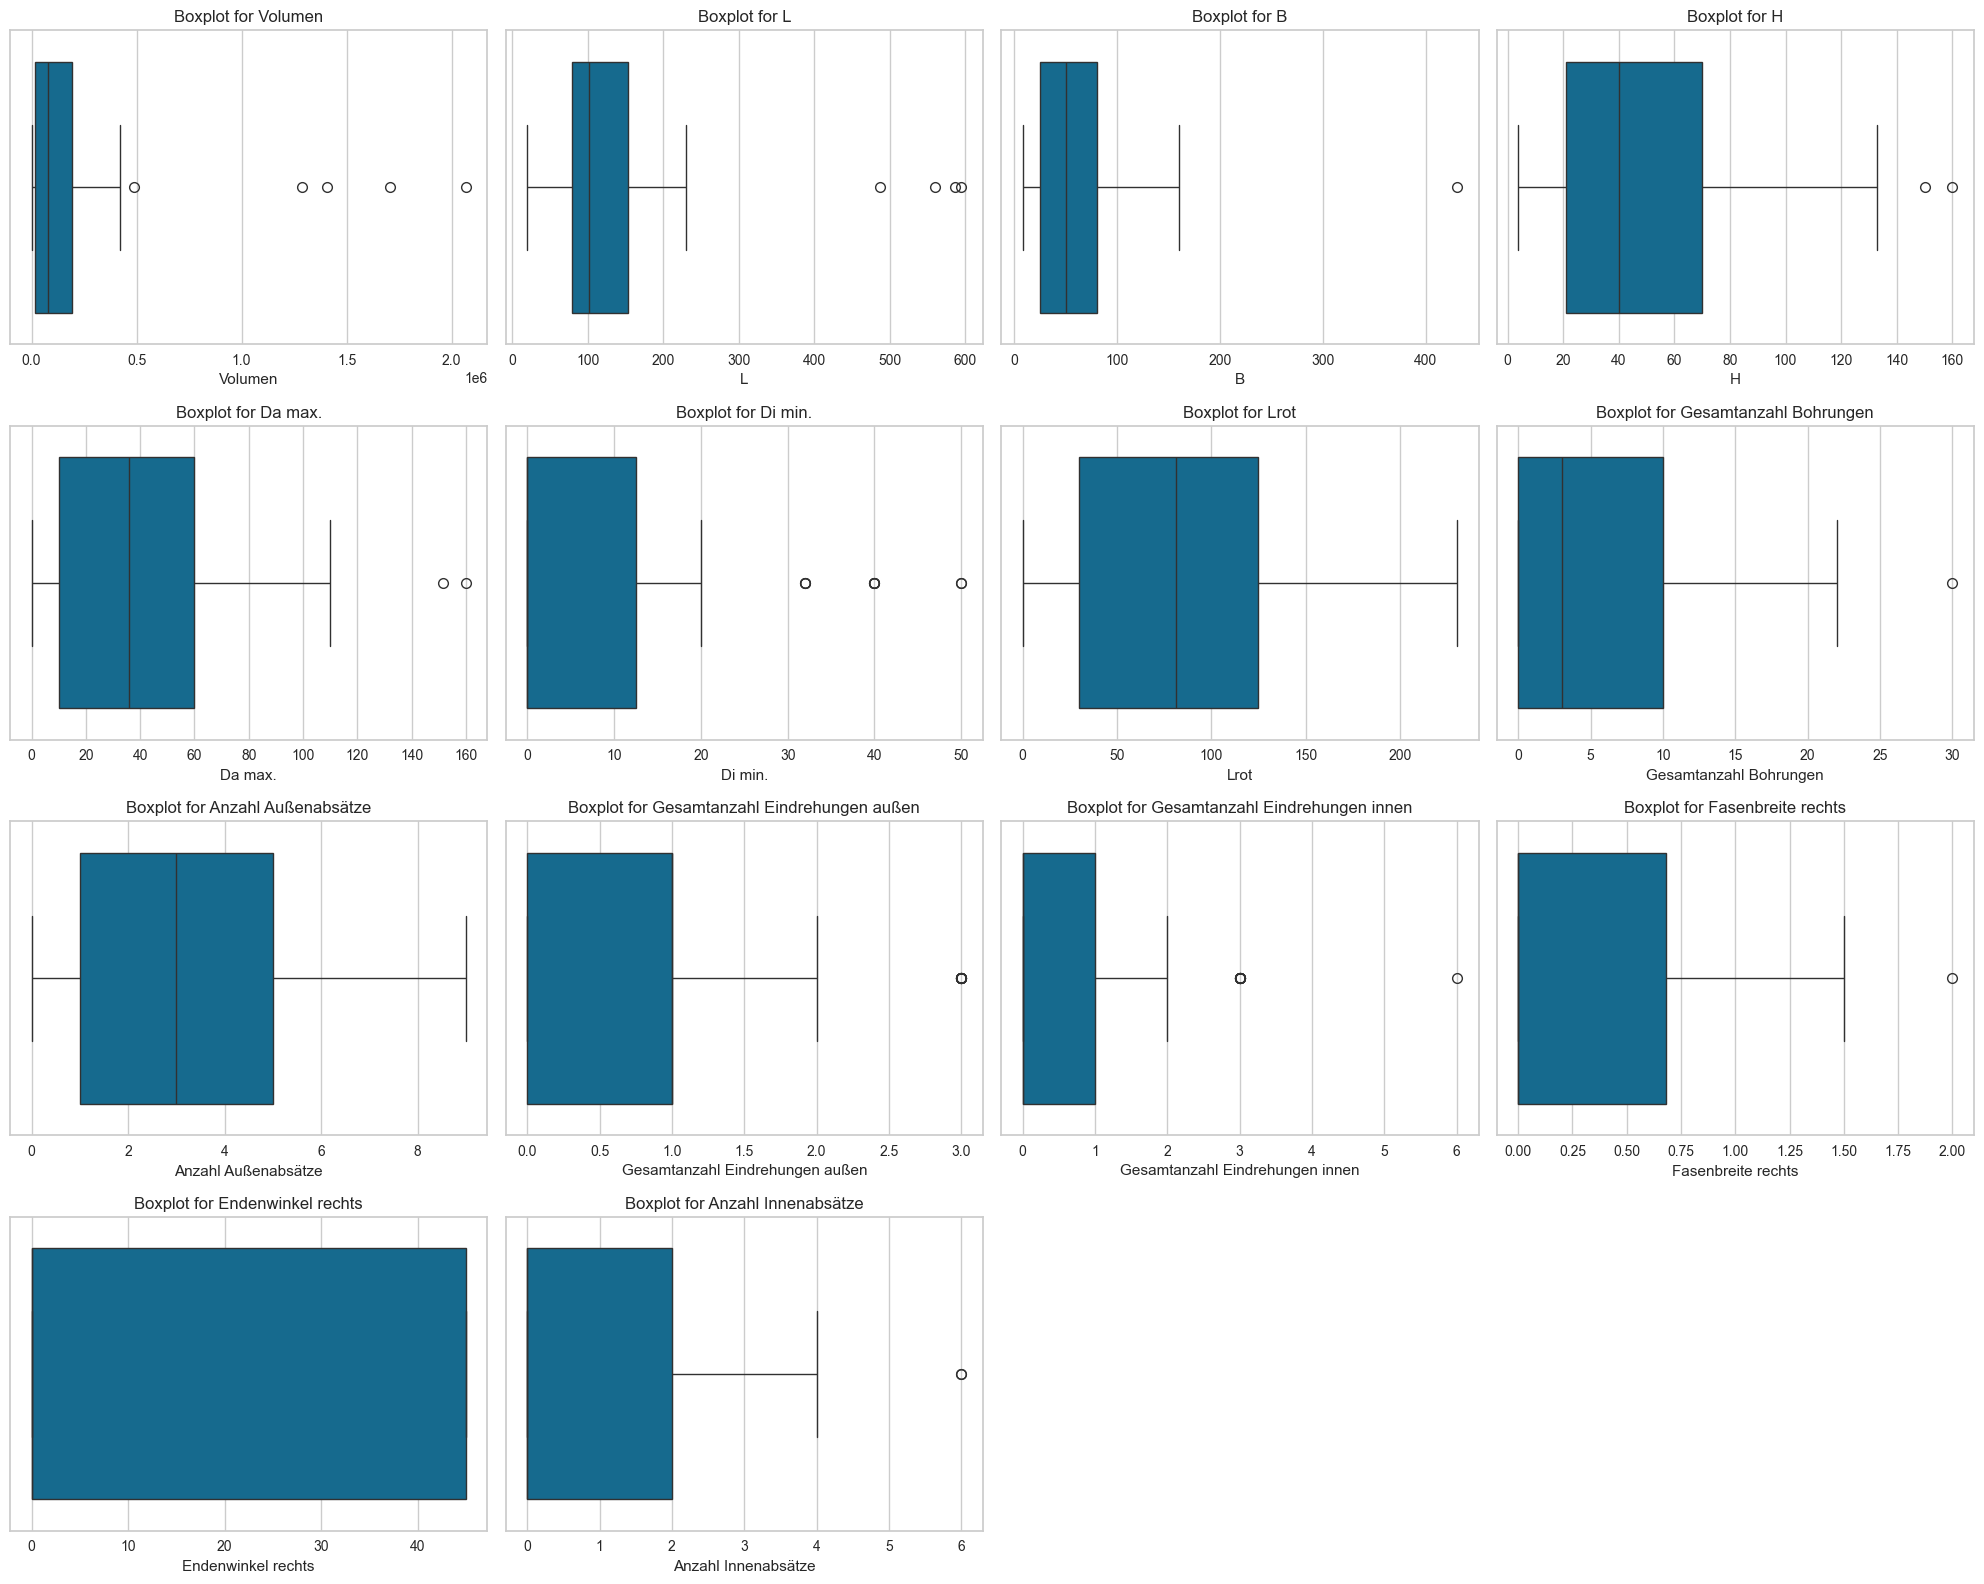

In [12]:
# show boxplots of the numerical columns
exploration.boxplots(data, num_columns)

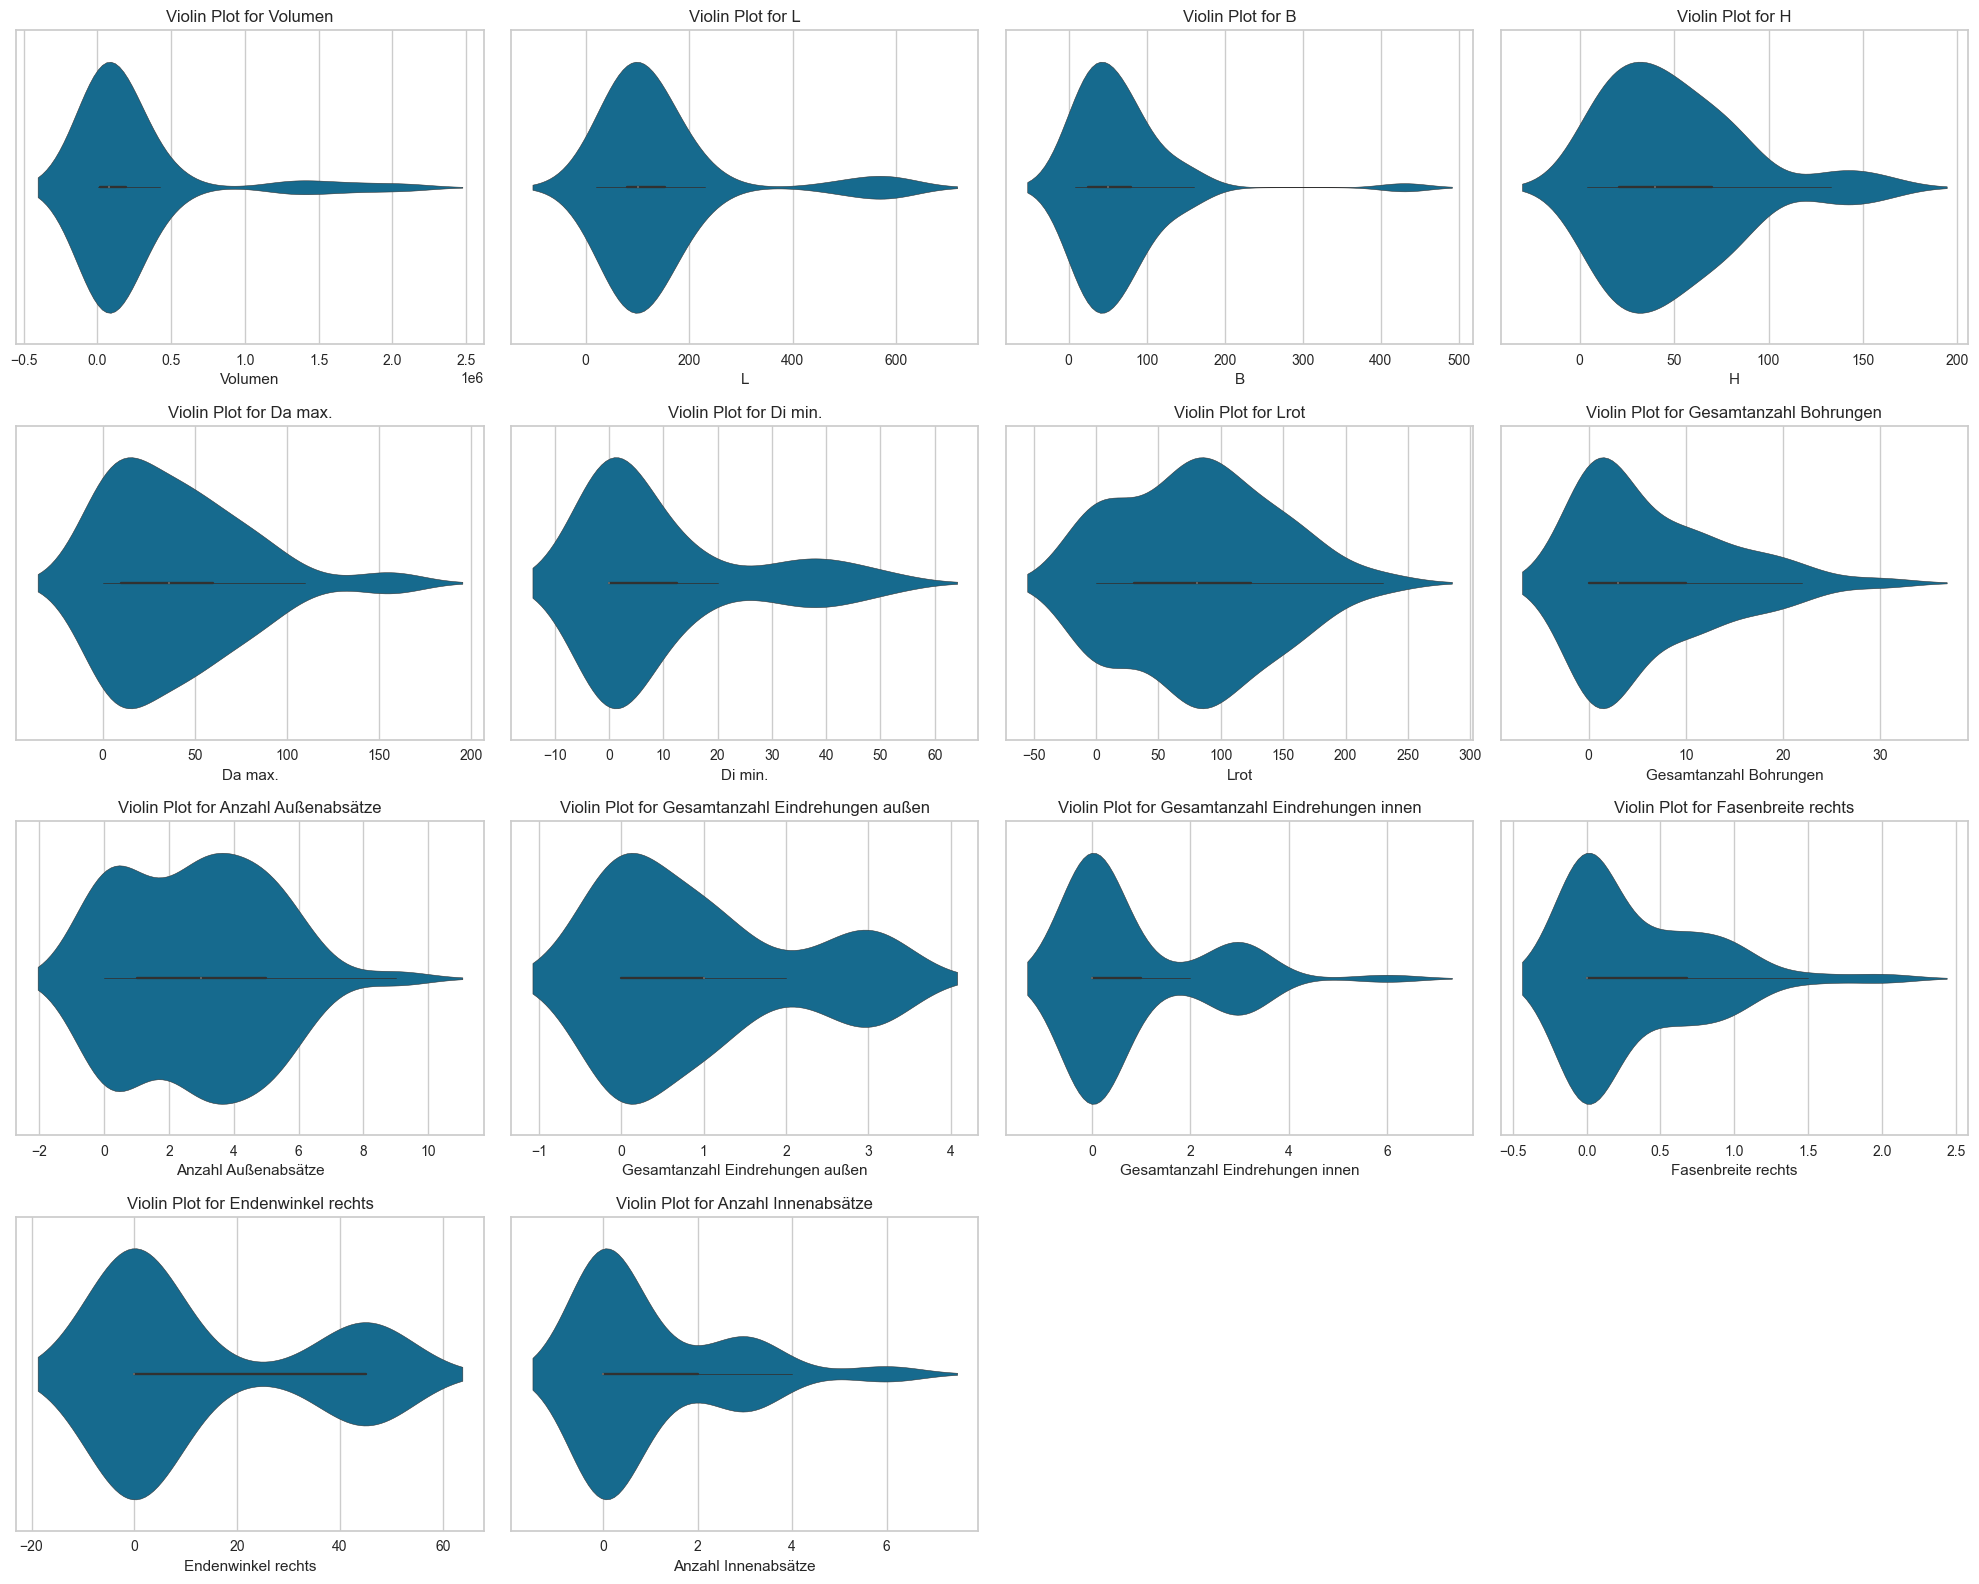

In [13]:
# show violonplot of data
exploration.violinplots(data, num_columns)

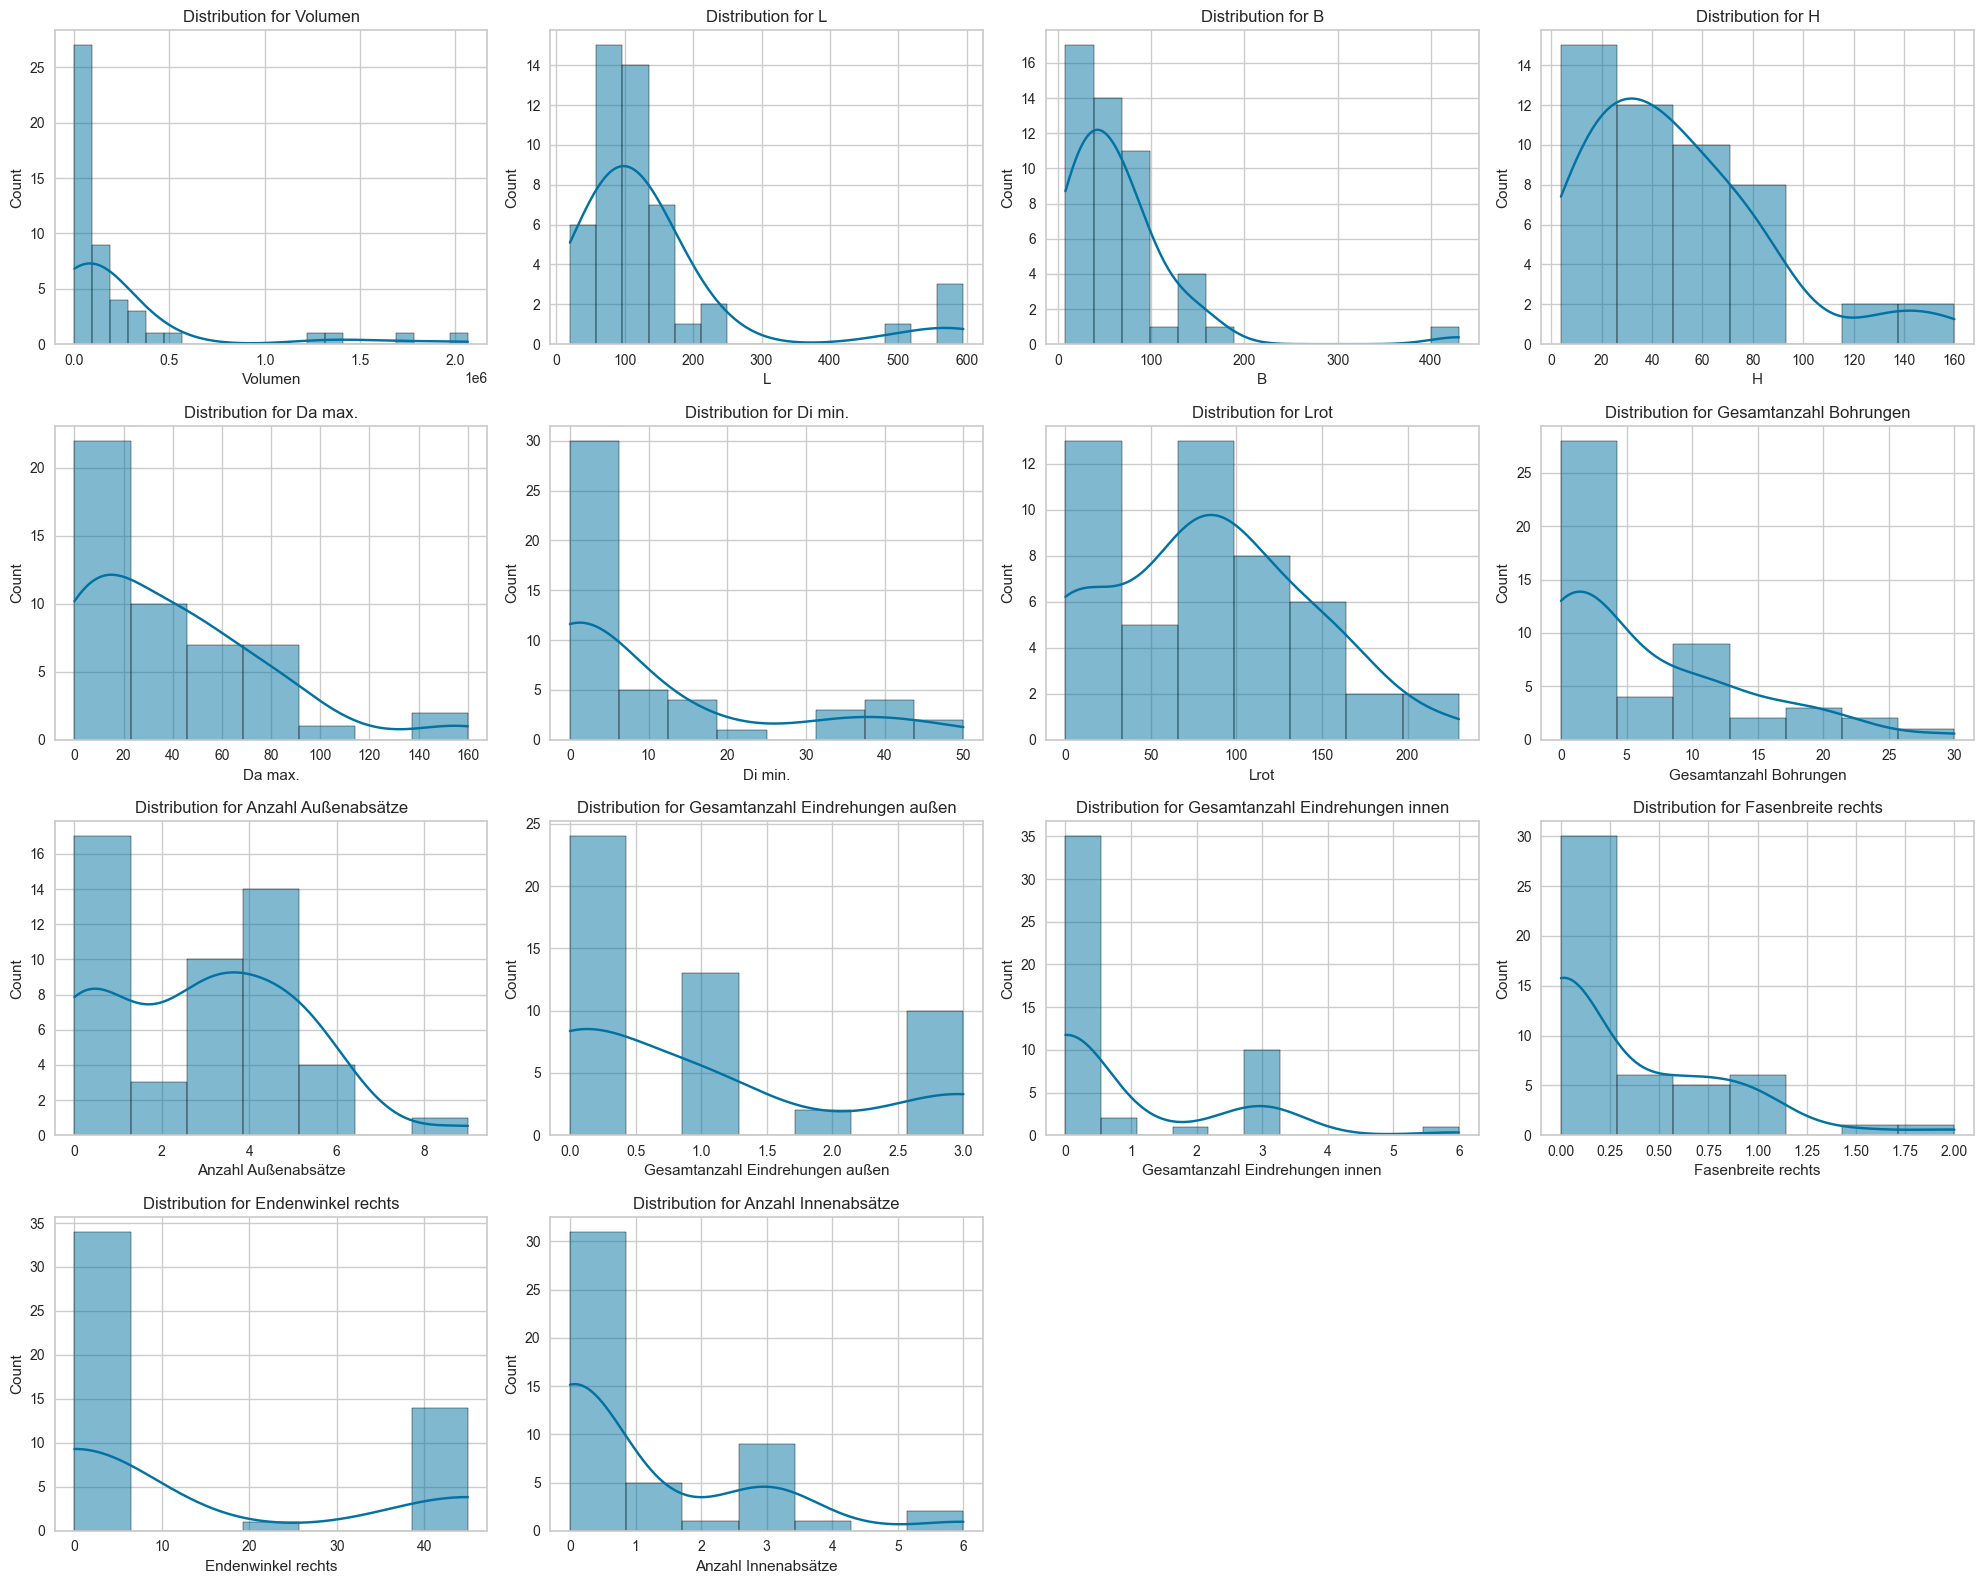

In [14]:
# show histograms of categorical columns
exploration.distributions(data, num_columns)

In [15]:
# show parallel_coordinates_plot of data
# exploration.barplots(data, cat_columns)

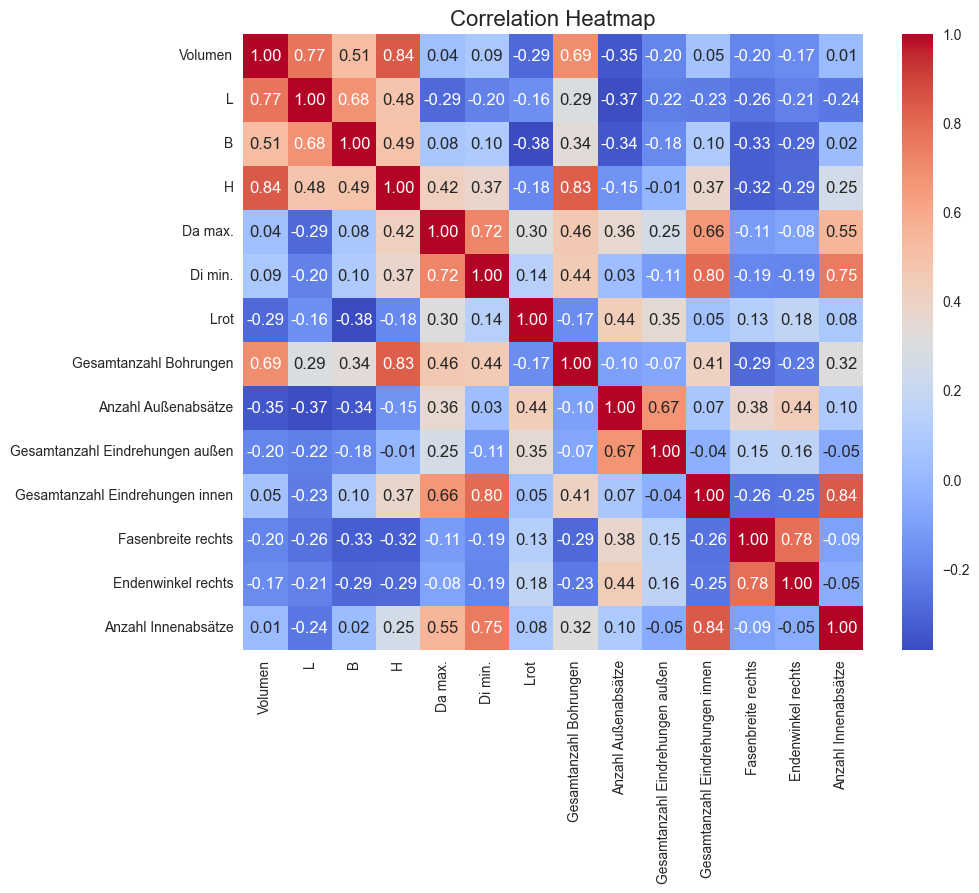

In [16]:
# show heatmap of data
exploration.heatmap(data, num_columns)

In [17]:
# z-score analysis of data
exploration.z_score_analysis(data, num_columns)

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Gesamtanzahl Eindrehungen außen,...,BELEGUNGSEINHEIT_NR 63720,BELEGUNGSEINHEIT_NR 68200,BELEGUNGSEINHEIT_NR 64102,BELEGUNGSEINHEIT_NR 64103,BELEGUNGSEINHEIT_NR 68205,BELEGUNGSEINHEIT_NR 96501,BELEGUNGSEINHEIT_NR 64506,BELEGUNGSEINHEIT_NR 62203,BELEGUNGSEINHEIT_NR 66300,BELEGUNGSEINHEIT_NR 63101
Teil,,,,,,,,,,,,,,,,,,,,,
3470474,23884.52,68.5,36.0,32.0,36.0,10.0,68.5,4.0,5.0,2.0,...,0,0,0,0,0,1,0,0,0,1
3632342,120487.58,80.0,61.0,61.0,61.0,16.3,80.0,6.0,2.0,1.0,...,0,0,0,1,0,1,0,0,0,1
3656547,1705082.50,587.0,133.0,133.0,0.0,0.0,0.0,18.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
3656552,2067654.99,560.0,150.0,150.0,0.0,0.0,0.0,22.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
3681000,9401.35,60.0,21.0,21.0,21.0,14.0,60.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
503200034,488550.81,595.0,430.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
520100768,1288963.97,170.0,160.0,160.0,160.0,40.0,170.0,30.0,2.0,1.0,...,0,0,0,0,0,1,0,0,0,1


In [18]:
# apply isolation forest to detect outliers
exploration.isolation_forest(data, num_columns)

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Gesamtanzahl Eindrehungen außen,...,BELEGUNGSEINHEIT_NR 63720,BELEGUNGSEINHEIT_NR 68200,BELEGUNGSEINHEIT_NR 64102,BELEGUNGSEINHEIT_NR 64103,BELEGUNGSEINHEIT_NR 68205,BELEGUNGSEINHEIT_NR 96501,BELEGUNGSEINHEIT_NR 64506,BELEGUNGSEINHEIT_NR 62203,BELEGUNGSEINHEIT_NR 66300,BELEGUNGSEINHEIT_NR 63101
Teil,,,,,,,,,,,,,,,,,,,,,
3656552,2067654.99,560.0,150.0,150.0,0.0,0.0,0.0,22.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
503200034,488550.81,595.0,430.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
520100768,1288963.97,170.0,160.0,160.0,160.0,40.0,170.0,30.0,2.0,1.0,...,0,0,0,0,0,1,0,0,0,1


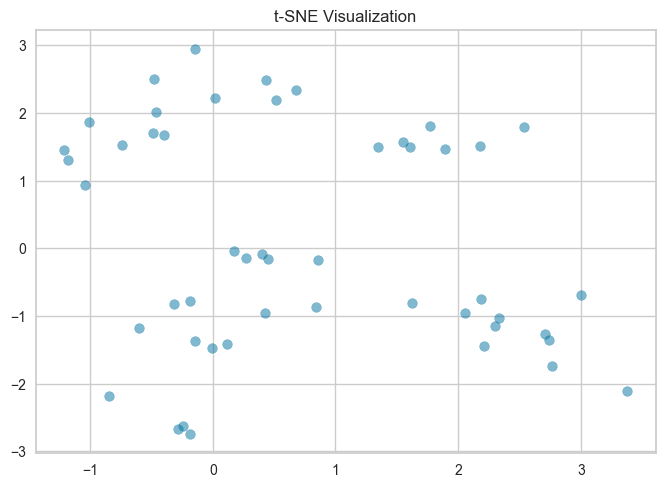

In [19]:
# apply tsne_visualization to visualize the data
exploration.tsne_visualization(data_preprocessed, num_columns)

__Clustering__

In [20]:
### calculate distance matrix
distance_matrix = clustering.gower_distance(data)

In [21]:
### plot the elbow plot for the first 20 clusters
clustering.elbow_plot_agglomerative(data_preprocessed, distance_matrix, 2, 48)

AttributeError: module 'prevelop.clustering' has no attribute 'elbow_plot_agglomerative'

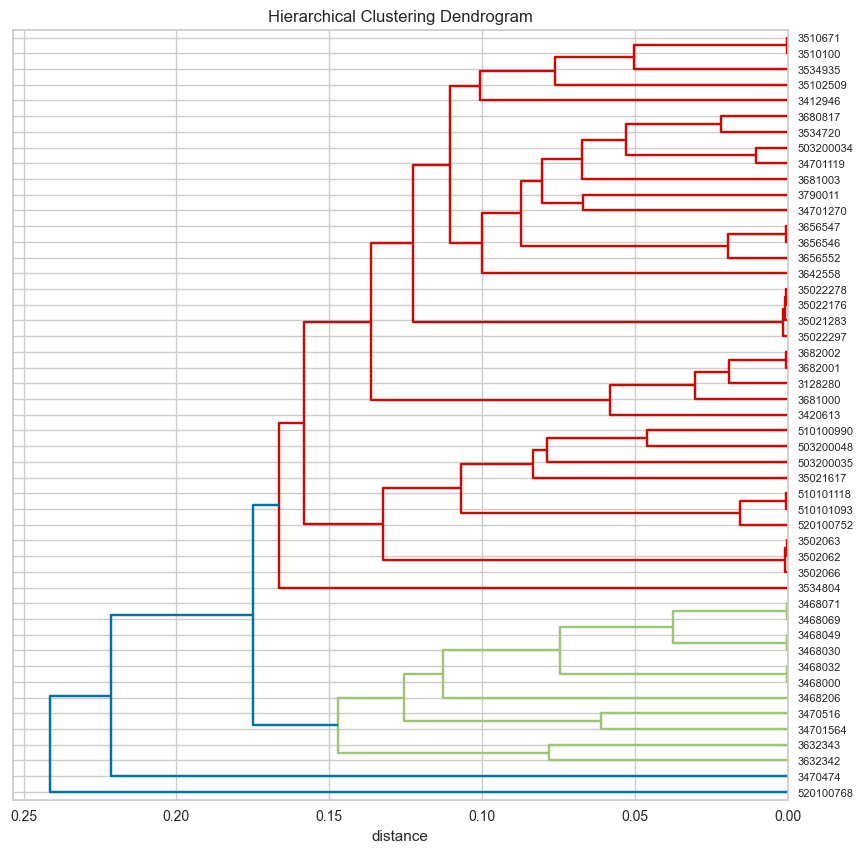

In [ ]:
### plot the dendrogram
clustering.plot_dendrogram(distance_matrix, labels=data.index, orientation='left')

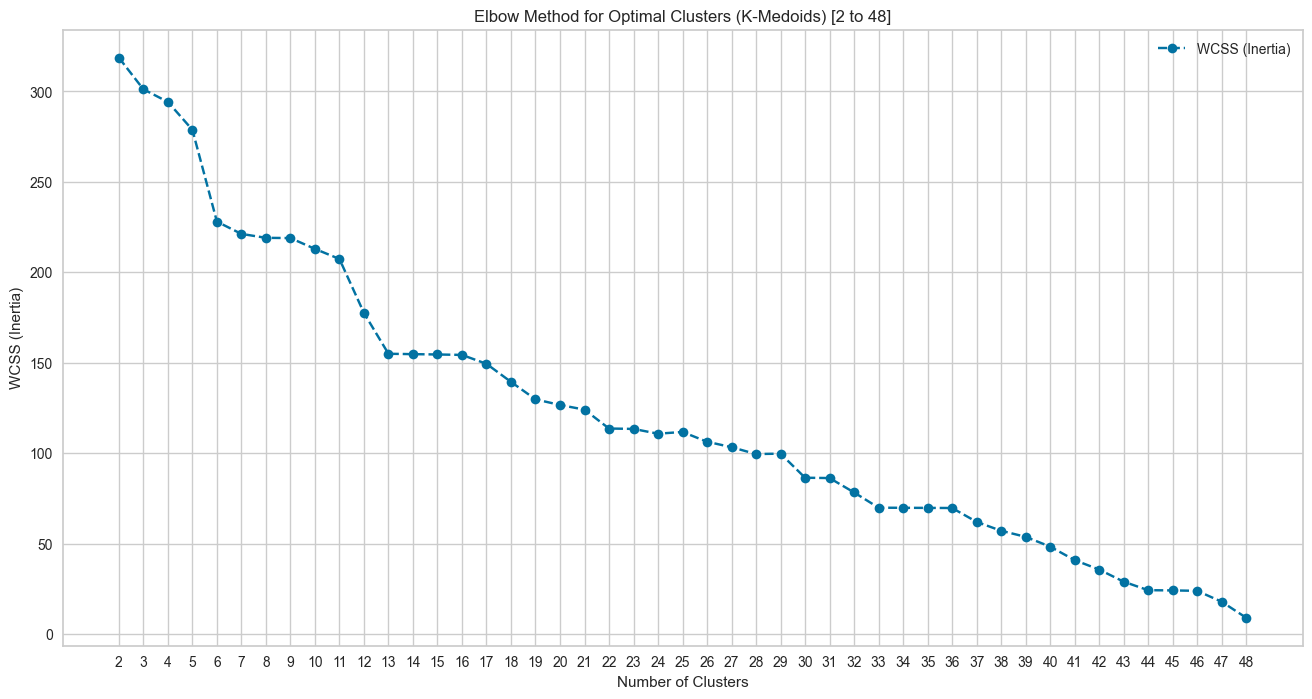

In [ ]:
### find clusters with k-medoids and apply elbow and shilouette method
clustering.elbow_plot_kmedoids(data_preprocessed, 2, 48)

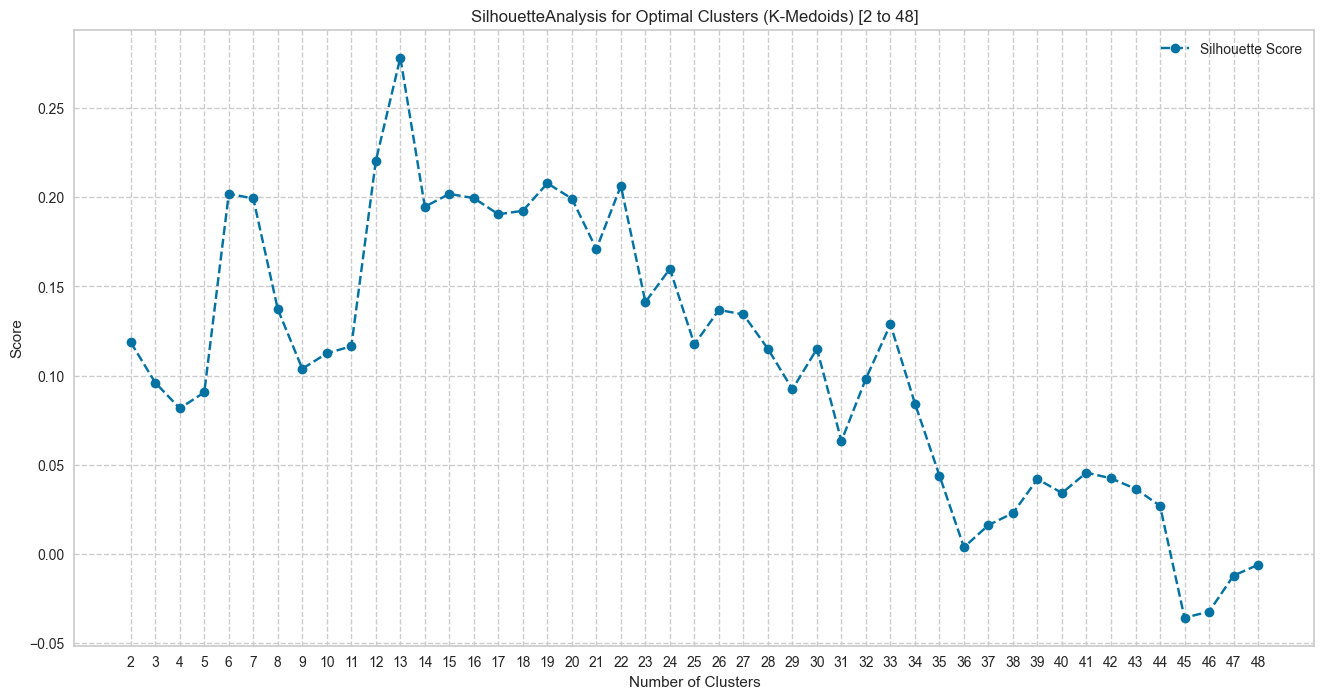

In [ ]:
### find clusters with k-medoids and apply elbow and shilouette method
clustering.silhouette_score_kmedoids(data_preprocessed, 2, 48)

__Evaluation__

In [ ]:
labels = clustering.agglomerative_clustering(distance_matrix, 37)

In [ ]:
### Evaluate the clustering results
evaluation.evaluate_clustering(data_preprocessed, labels)

{'dbi': 0.022763435899545846,
 'ch-score': 2415.905385235192,
 'dunn-index': 9.899452856632427,
 'silhouette-score': 0.41222183055426}

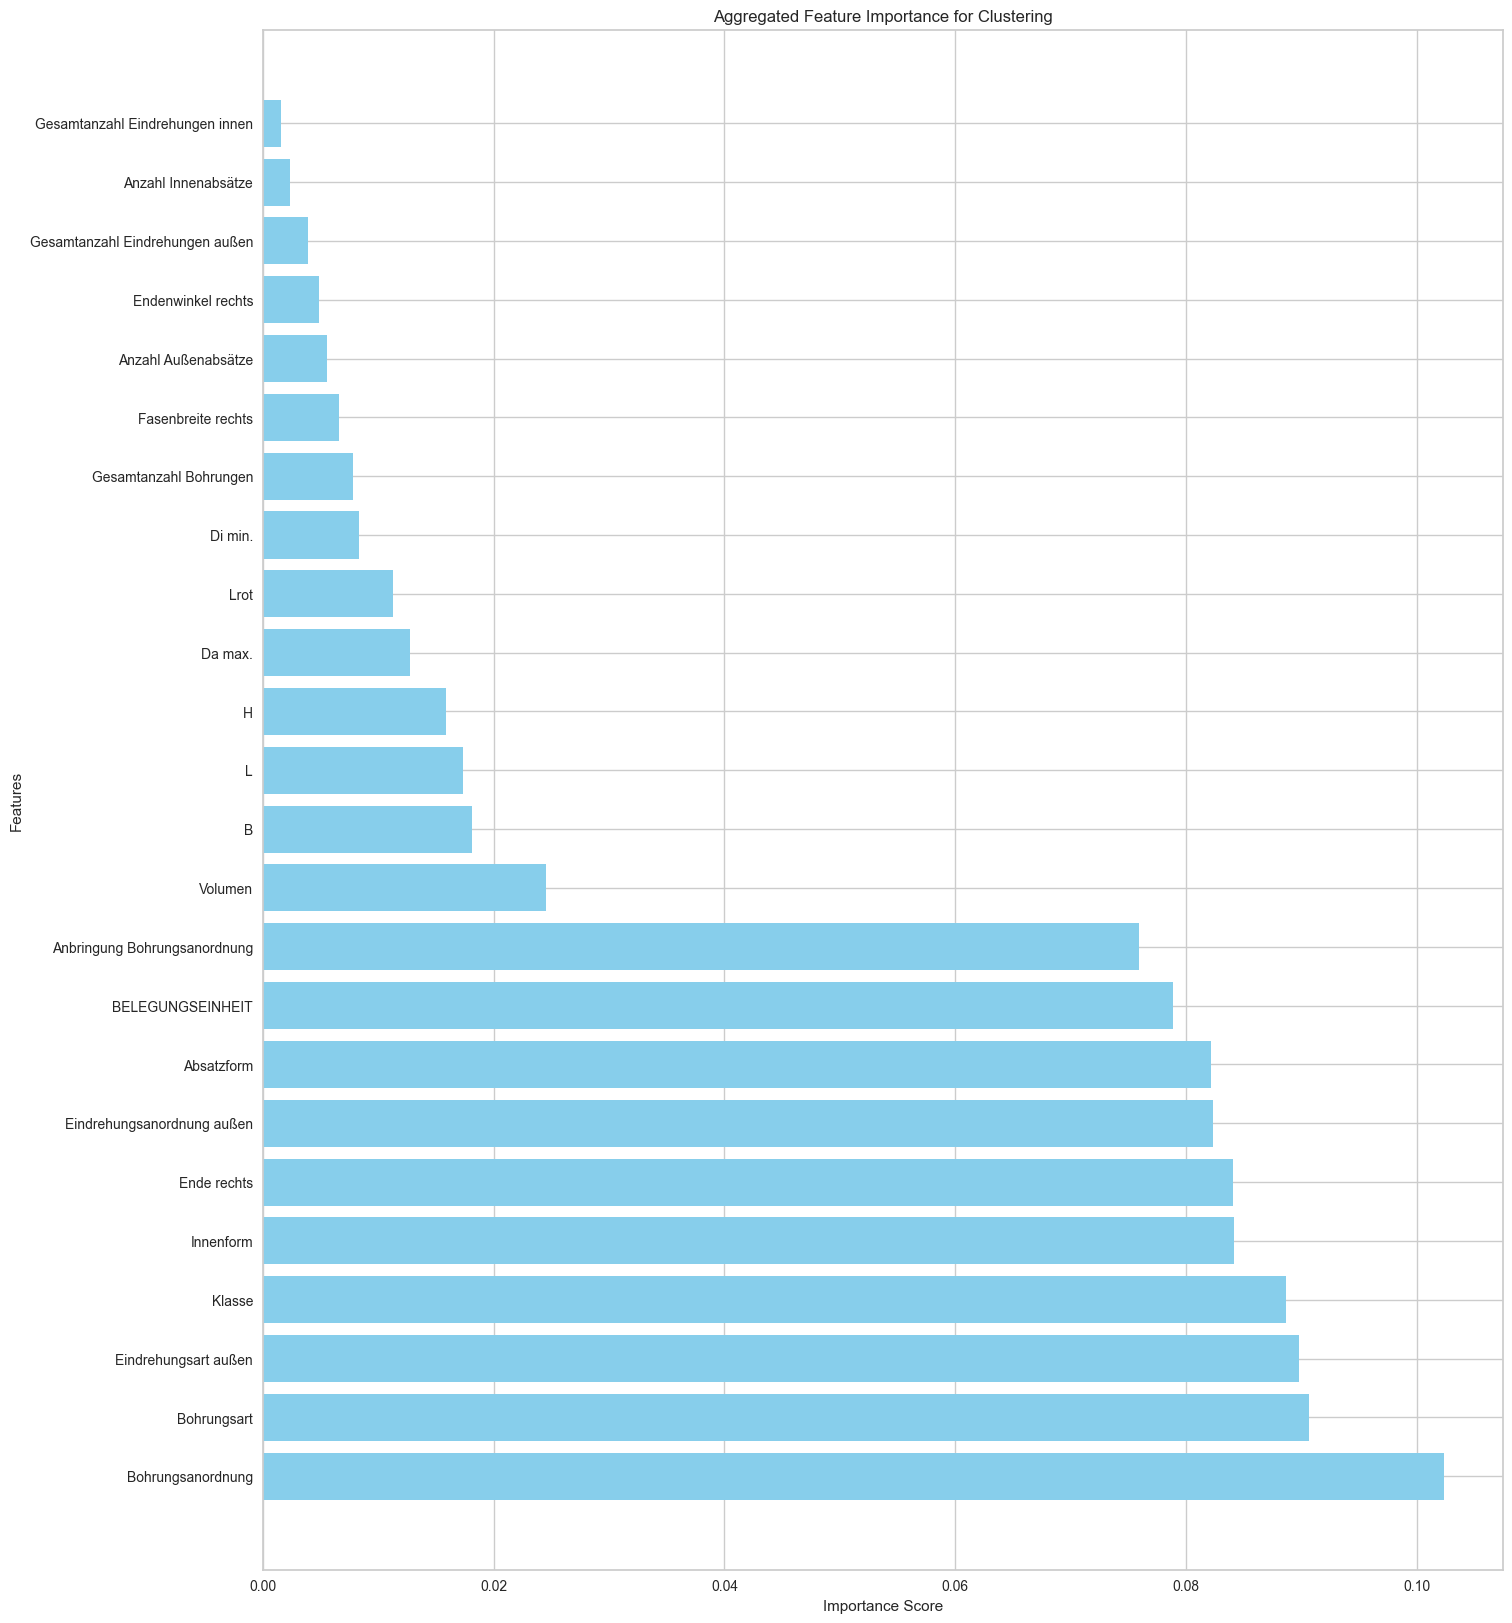

In [ ]:
### visualize the feature importance
evaluation.feature_importance(data_preprocessed, labels)

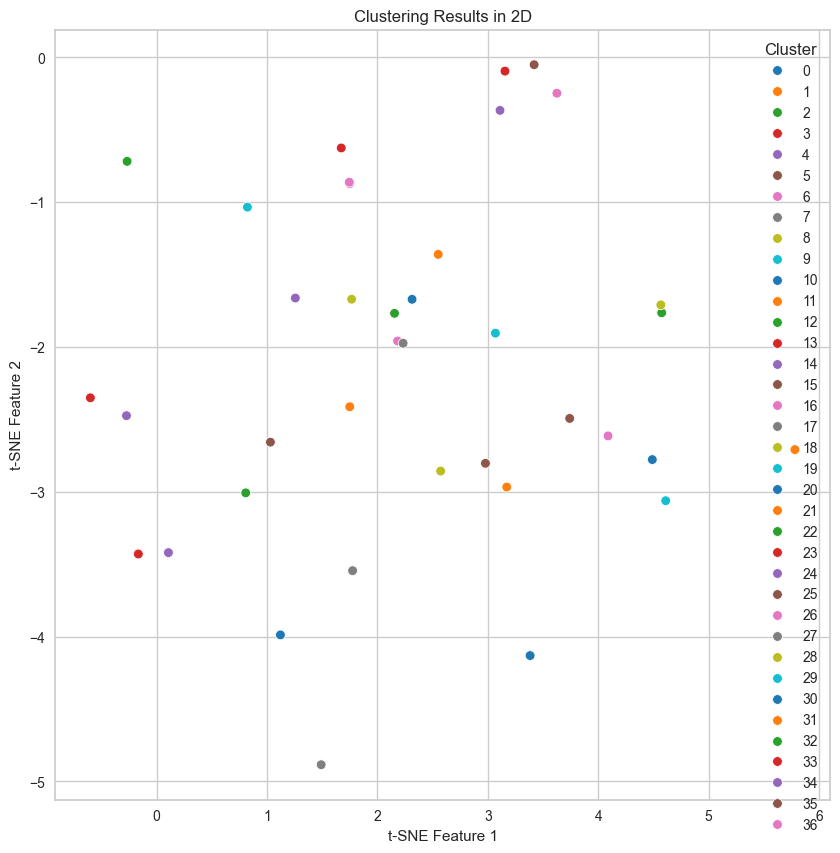

In [ ]:
### visualize the results
evaluation.plot_results_2d(data_preprocessed.values, labels)

In [ ]:
labels = clustering.kmedoids_clustering(distance_matrix, 21)

In [ ]:
### Evaluate the clustering results
evaluation.evaluate_clustering(data_preprocessed, labels)

{'dbi': 1.0754585359353679,
 'ch-score': 3.752162764571165,
 'dunn-index': 0.025881906041366084,
 'silhouette-score': 0.19724824146470624}

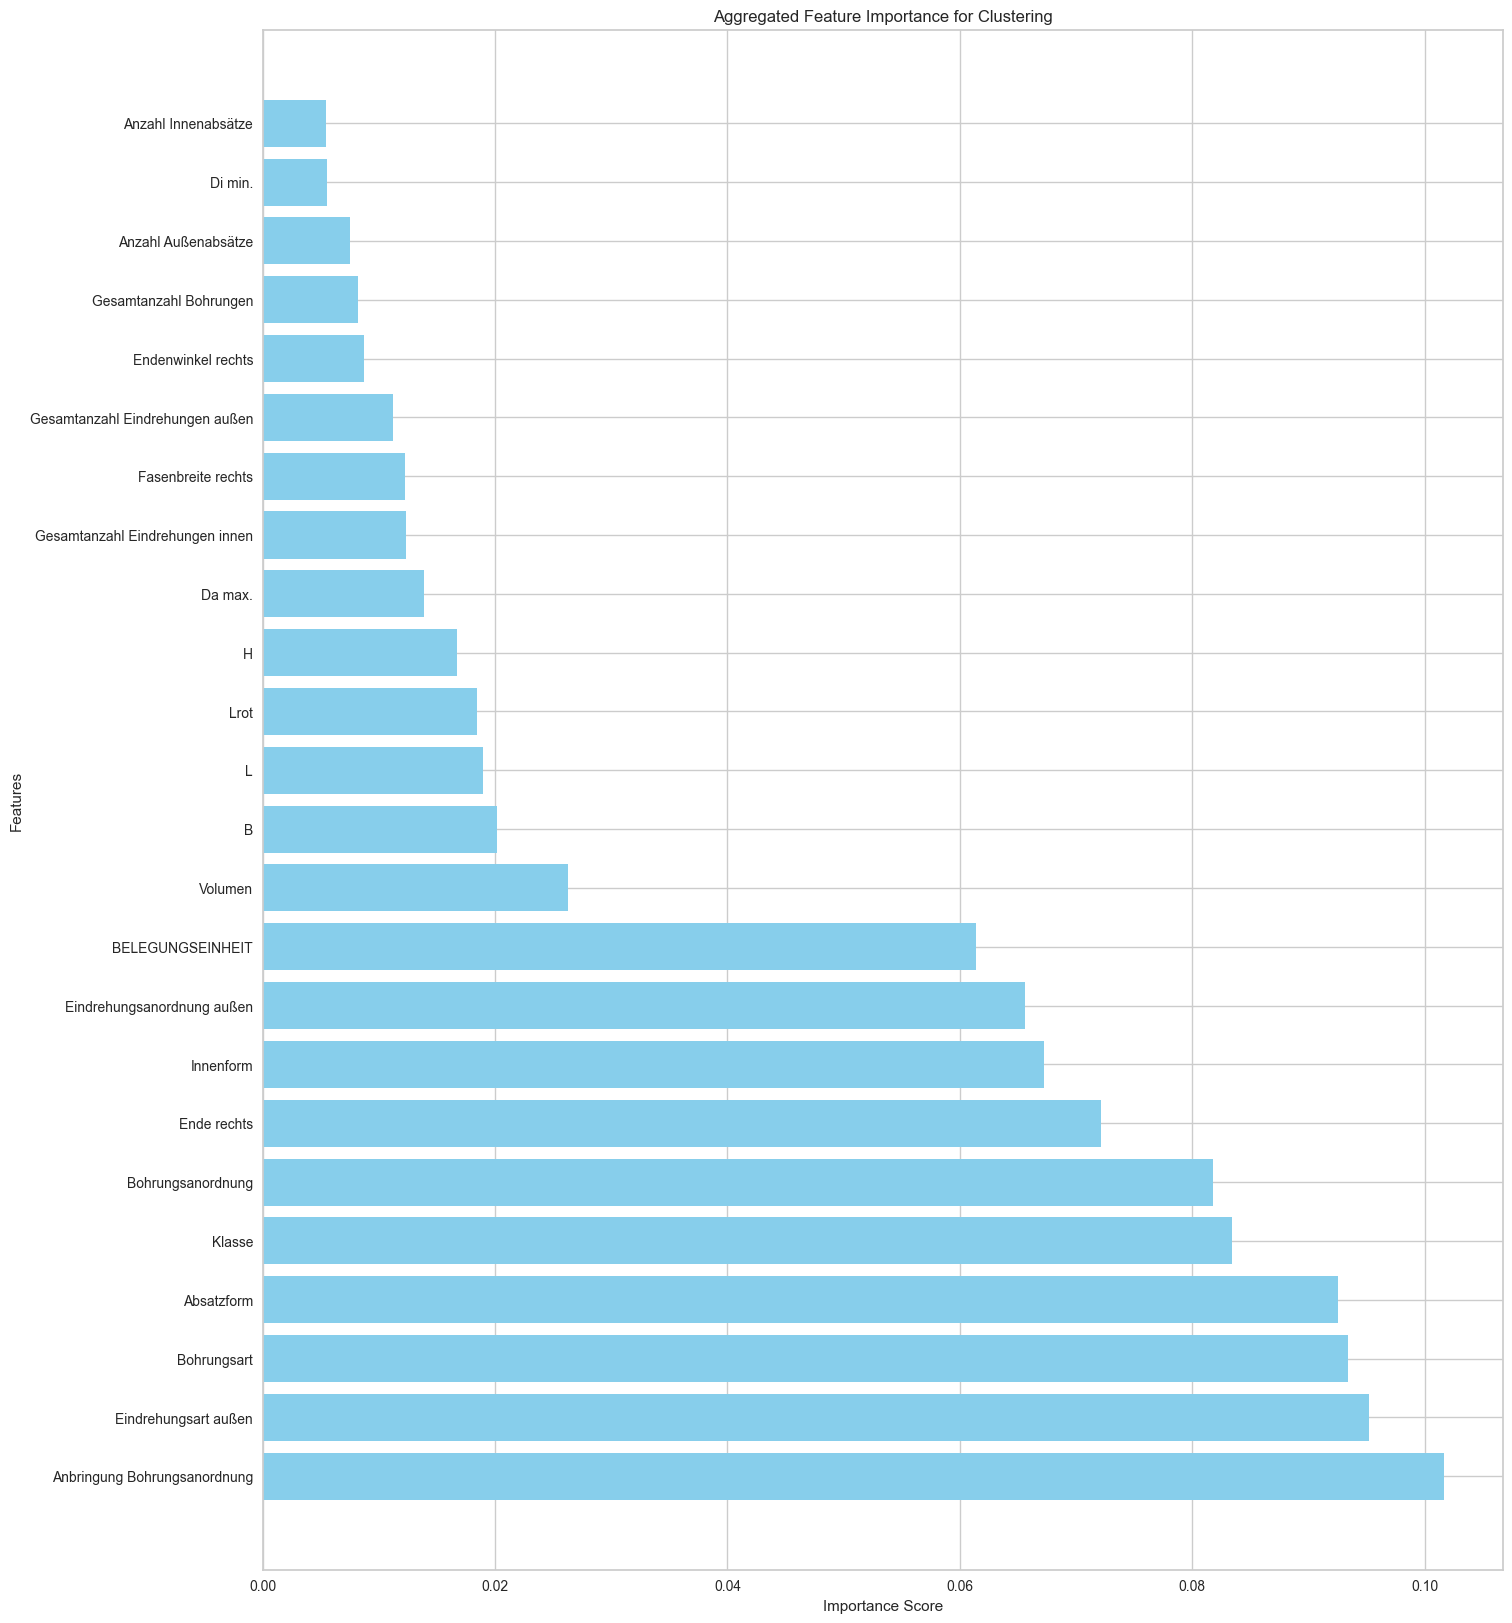

In [ ]:
### visualize the feature importance
evaluation.feature_importance(data_preprocessed, labels)

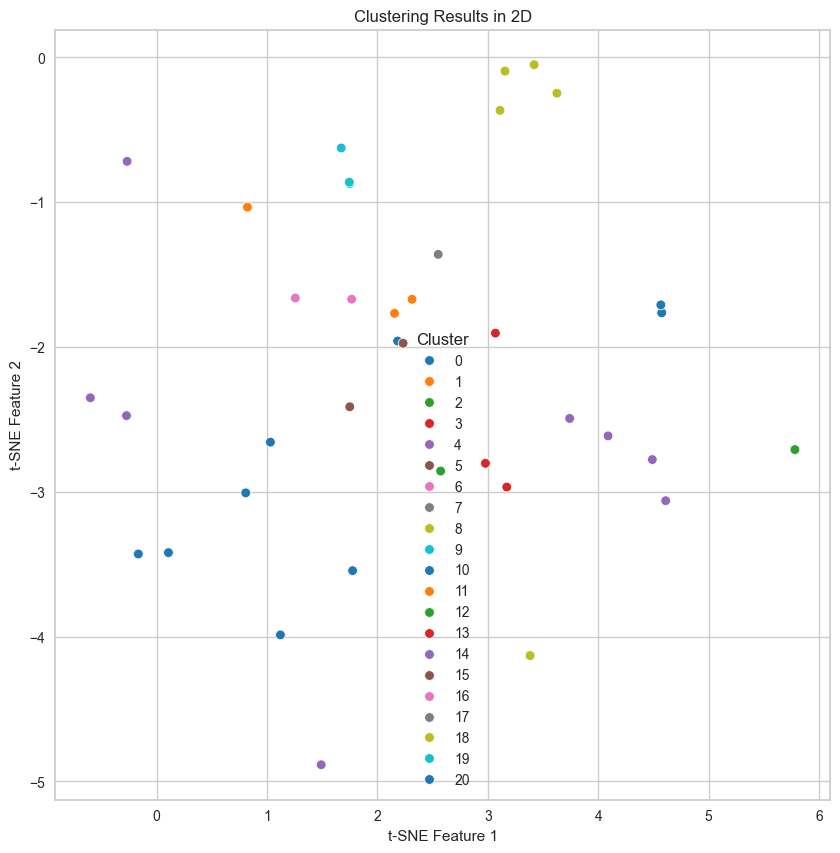

In [ ]:
### visualize the results
evaluation.plot_results_2d(data_preprocessed.values, labels)